In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [2]:
import os
data_dir = "/users/hanjiashu/desktop/Fall2020/ML2020Labs/ml_cats_dogs_lab/cat_dog_data"
cwd = os.getcwd()
os.chdir(cwd)
print(os.listdir(data_dir))

['.DS_Store', 'training_set', 'test_set']


In [3]:
train_cats_files = []
train_path_cats = data_dir +"/training_set/cats/"
for path in os.listdir(train_path_cats):
    if '.jpg' in path:
        train_cats_files.append(os.path.join(train_path_cats, path))
        
train_dogs_files = []
train_path_dogs = data_dir +"/training_set/dogs/"
for path in os.listdir(train_path_dogs):
    if '.jpg' in path:
        train_dogs_files.append(os.path.join(train_path_dogs, path))
        
print(len(train_cats_files), len(train_dogs_files))

test_cats_files = []
test_path_cats = data_dir +"/test_set/cats/"
for path in os.listdir(test_path_cats):
    if ".jpg" in path:
        test_cats_files.append(os.path.join(test_path_cats,path))

test_dogs_files = []
test_path_dogs = data_dir +"/test_set/dogs/"
for path in os.listdir(test_path_dogs):
    if '.jpg' in path:
        test_dogs_files.append(os.path.join(test_path_dogs, path))

print(len(test_cats_files), len(test_dogs_files))

4000 4000
1000 1000


In [4]:

from PIL import Image
from keras import preprocessing
import sys
k = 2
sample_dog_file = train_dogs_files[k]
img = preprocessing.image.load_img(sample_dog_file, target_size=(64, 64))
img_array = preprocessing.image.img_to_array(img)

Using TensorFlow backend.


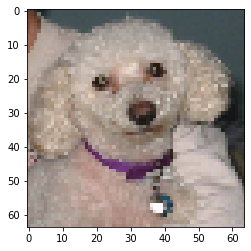

In [5]:
plt.imshow(np.uint8(img_array))

In [6]:
# image dimensions: using 32x32 pixels just for speed
d = 64
X_train_orig = np.zeros((8000, d, d, 3), dtype='float32')
for i in range(4000):    
    path = train_cats_files[i]
    img = preprocessing.image.load_img(path, target_size=(d, d))
    X_train_orig[i] = preprocessing.image.img_to_array(img)

for i in range(4000,8000):    
    path = train_dogs_files[i-4000]
    img = preprocessing.image.load_img(path, target_size=(d, d))
    X_train_orig[i] = preprocessing.image.img_to_array(img)    
    X_test_orig = np.zeros((2000, d, d, 3), dtype='float32')

X_test_orig

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [7]:
test_cats_files = []
test_path_cats = data_dir +"/test_set/cats/"
for path in os.listdir(test_path_cats):
    if '.jpg' in path:
        test_cats_files.append(os.path.join(test_path_cats,path))

test_dogs_files = []
test_path_dogs = data_dir +"/test_set/dogs/"
for path in os.listdir(test_path_dogs):
    if '.jpg' in path:
        test_dogs_files.append(os.path.join(test_path_dogs, path))

len(test_cats_files), len(test_dogs_files)

(1000, 1000)

In [8]:
X_test_orig = np.zeros((2000, d, d, 3), dtype='float32')  
for i in range(1000):    
    path = test_cats_files[i]
    img = preprocessing.image.load_img(path, target_size=(d, d))
    X_test_orig[i] = preprocessing.image.img_to_array(img)

for i in range(1000,2000):    
    path = test_dogs_files[i-1000]
    img = preprocessing.image.load_img(path, target_size=(d,d))
    X_test_orig[i] = preprocessing.image.img_to_array(img)    

X_test_orig.shape

(2000, 64, 64, 3)

In [9]:
X_train = X_train_orig / 255.0
X_test = X_test_orig / 255.0
print(X_train.shape)
print(X_test.shape)

(8000, 64, 64, 3)
(2000, 64, 64, 3)


In [10]:
from keras.utils.np_utils import to_categorical 

Y_train_orig = np.ones((4000,)) 
Y_train_orig = np.concatenate((Y_train_orig, np.zeros((4000,)))) 
Y_train = Y_train_orig.reshape(-1)
print("At position 3 should be a cat:", Y_train[3])
print("At position 4002 should be a dog:", Y_train[4002])

Y_train = to_categorical(Y_train, num_classes = 2)

print(Y_train.shape)

Y_test_orig = np.ones((1000,))
Y_test_orig = np.concatenate((Y_test_orig, np.zeros((1000,)))) 
Y_test = Y_test_orig.reshape(-1)
Y_test = to_categorical(Y_test, num_classes = 2)

print(Y_test.shape)


At position 3 should be a cat: 1.0
At position 4002 should be a dog: 0.0
(8000, 2)
(2000, 2)


### Build model


In [29]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (d,d,3)))
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 32, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.25))


# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
# model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

In [30]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [31]:
epochs = 50  # for better result increase the epochs
batch_size = 250

In [32]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=5,  
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False, 
        vertical_flip=False)  

datagen.fit(X_train)

In [33]:

# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, 
                              validation_data = (X_test,Y_test),
                              steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/50
32/32 [==============================] - 17s 541ms/step - loss: 0.7262 - accuracy: 0.5020 - val_loss: 0.6897 - val_accuracy: 0.5315
Epoch 2/50
32/32 [==============================] - 15s 470ms/step - loss: 0.6808 - accuracy: 0.5891 - val_loss: 0.6673 - val_accuracy: 0.5775
Epoch 3/50
32/32 [==============================] - 16s 503ms/step - loss: 0.6440 - accuracy: 0.6345 - val_loss: 0.6231 - val_accuracy: 0.6635
Epoch 4/50
32/32 [==============================] - 15s 478ms/step - loss: 0.6240 - accuracy: 0.6611 - val_loss: 0.6472 - val_accuracy: 0.6120
Epoch 5/50
32/32 [==============================] - 15s 467ms/step - loss: 0.6097 - accuracy: 0.6714 - val_loss: 0.5962 - val_accuracy: 0.6915
Epoch 6/50
32/32 [==============================] - 15s 466ms/step - loss: 0.5896 - accuracy: 0.6884 - val_loss: 0.6872 - val_accuracy: 0.6020
Epoch 7/50
32/32 [==============================] - 15s 469ms/step - loss: 0.5900 - accuracy: 0.6864 - val_loss: 0.5737 - val_accuracy: 0.7055

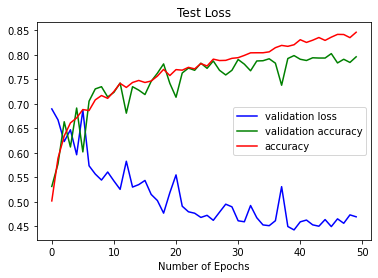

In [34]:

# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.plot(history.history['val_accuracy'], color='g', label="validation accuracy")
plt.plot(history.history['accuracy'], color='r', label="accuracy")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
#plt.ylabel("Loss")
plt.legend()
plt.show()

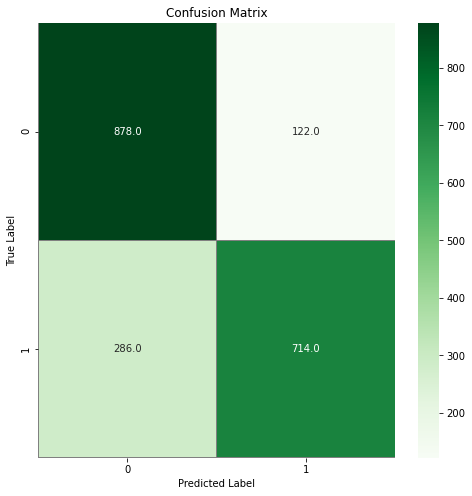

In [41]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()